In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def is_lens_valid(d, f, usable_diameter_fraction):
    max_beam_angle = cantilever_angle * 4
    r_beam = f * math.tan(math.radians(max_beam_angle))
    print(r_beam)
    return r_beam < (d * usable_diameter_fraction) / 2
    

#tan(theta) = opp / adj --> opp = adj * tan(theta)

d = 50.8 # [mm]
f = 75.0 # [mm]
cantilever_angle = 4 # [degrees]

#is_lens_valid(d, f)


d = np.arange(0, 100 , 1)
f = np.arange(0, 250, 1)
dg, fg = np.meshgrid(d, f)

usable_diameter_fraction = 1.0
a = is_lens_valid(dg, fg, usable_diameter_fraction)

usable_diameter_fraction = 0.9
b = is_lens_valid(dg, fg, usable_diameter_fraction)

c = np.ones_like(dg) * a + np.ones_like(dg) * b

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.28674539  0.28674539  0.28674539 ...  0.28674539  0.28674539
   0.28674539]
 [ 0.57349077  0.57349077  0.57349077 ...  0.57349077  0.57349077
   0.57349077]
 ...
 [70.82611028 70.82611028 70.82611028 ... 70.82611028 70.82611028
  70.82611028]
 [71.11285567 71.11285567 71.11285567 ... 71.11285567 71.11285567
  71.11285567]
 [71.39960105 71.39960105 71.39960105 ... 71.39960105 71.39960105
  71.39960105]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.28674539  0.28674539  0.28674539 ...  0.28674539  0.28674539
   0.28674539]
 [ 0.57349077  0.57349077  0.57349077 ...  0.57349077  0.57349077
   0.57349077]
 ...
 [70.82611028 70.82611028 70.82611028 ... 70.82611028 70.82611028
  70.82611028]
 [71.11285567 71.11285567 71.11285567 ... 71.11285567 71.11285567
  71.11285567]
 [71.39960105 71.39960105 71.39960105 ... 71.39960105 71.39960105
  71.39960105]]


In [11]:
tl = pd.read_csv('thorlabs-lenses.csv', header=0)
print(tl.d)

0     25.4
1     25.4
2     25.4
3     25.4
4     25.4
5     25.4
6     25.4
7     25.4
8     25.4
9     25.4
10    25.4
11    25.4
12    25.4
13    25.4
14    25.4
15    25.4
16    50.8
17    50.8
18    50.8
19    50.8
20    50.8
21    50.8
22    50.8
23    50.8
24    50.8
25    50.8
26    50.8
27    50.8
Name: d, dtype: float64


Text(45, 65, "$f=75.0$mm, $d=2''$")

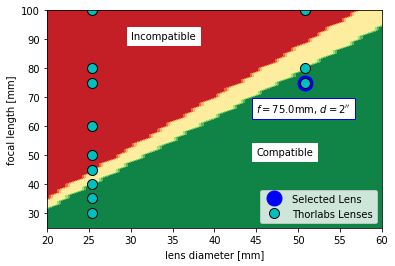

In [57]:
#plt.scatter(dg, fg, c=a)
plt.contourf(dg, fg, c)
plt.set_cmap('RdYlGn')

plt.plot(50.8, 75.0, marker='o', color='b', linestyle='none', label='Selected Lens', markersize=15)
plt.plot(tl.d, tl.f, marker='o', color='c', markeredgecolor='k', linestyle='none', label='Thorlabs Lenses', markersize=10)


plt.xlabel('lens diameter [mm]')
plt.ylabel('focal length [mm]')

plt.legend()

plt.xlim([20, 60])
plt.ylim([25, 100])
plt.text(30, 90, 'Incompatible', backgroundcolor='w')
plt.text(45, 50, 'Compatible', backgroundcolor='w')
plt.text(45, 65, '$f=75.0$mm, $d=2\'\'$', bbox=dict(facecolor='w', edgecolor='b'))